### Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

## Import Cleaned Dataset

In [2]:
data = pd.read_csv("Cleaned.csv")
#view data
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_datetime
0,0,INN00001,2,0,1,2,0,0,0,224,Offline,0,0,0,65.00,0,1,2017-10-02
1,1,INN00002,2,0,2,3,3,0,0,5,Online,0,0,0,106.68,1,1,2018-11-06
2,2,INN00003,1,0,2,1,0,0,0,1,Online,0,0,0,60.00,0,0,2018-02-28
3,3,INN00004,2,0,0,2,0,0,0,211,Online,0,0,0,100.00,0,0,2018-05-20
4,4,INN00005,2,0,1,1,3,0,0,48,Online,0,0,0,94.50,0,0,2018-04-11


To convert market_segment_type using one hot encoding

In [3]:
data = pd.get_dummies(data,prefix=['market_segment_type'], columns = ['market_segment_type'])
data.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_datetime,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0,INN00001,2,0,1,2,0,0,0,224,...,0,65.00,0,1,2017-10-02,0,0,0,1,0
1,1,INN00002,2,0,2,3,3,0,0,5,...,0,106.68,1,1,2018-11-06,0,0,0,0,1
2,2,INN00003,1,0,2,1,0,0,0,1,...,0,60.00,0,0,2018-02-28,0,0,0,0,1
3,3,INN00004,2,0,0,2,0,0,0,211,...,0,100.00,0,0,2018-05-20,0,0,0,0,1
4,4,INN00005,2,0,1,1,3,0,0,48,...,0,94.50,0,0,2018-04-11,0,0,0,0,1


### Model 1: Decision Tree Classifier

We are investigating which variables are the most accurate in predicting 

/tmp/ipykernel_445190/1370307458.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Predictor': i, 'Classification Score': score}, ignore_index=True)
/tmp/ipykernel_445190/1370307458.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Predictor': i, 'Classification Score': score}, ignore_index=True)
/tmp/ipykernel_445190/1370307458.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Predictor': i, 'Classification Score': score}, ignore_index=True)
/tmp/ipykernel_445190/1370307458.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res

   Variable  Classification Score                             Predictor
0       NaN              0.677434                          no_of_adults
1       NaN              0.665819                        no_of_children
2       NaN              0.681527                  no_of_weekend_nights
3       NaN              0.672456                     no_of_week_nights
4       NaN              0.670354                     type_of_meal_plan
5       NaN              0.668252            required_car_parking_space
6       NaN              0.668363                    room_type_reserved
7       NaN              0.768142                             lead_time
8       NaN              0.675553                        repeated_guest
9       NaN              0.675000          no_of_previous_cancellations
10      NaN              0.668695  no_of_previous_bookings_not_canceled
11      NaN              0.707522                    avg_price_per_room
12      NaN              0.665819                no_of_special_r

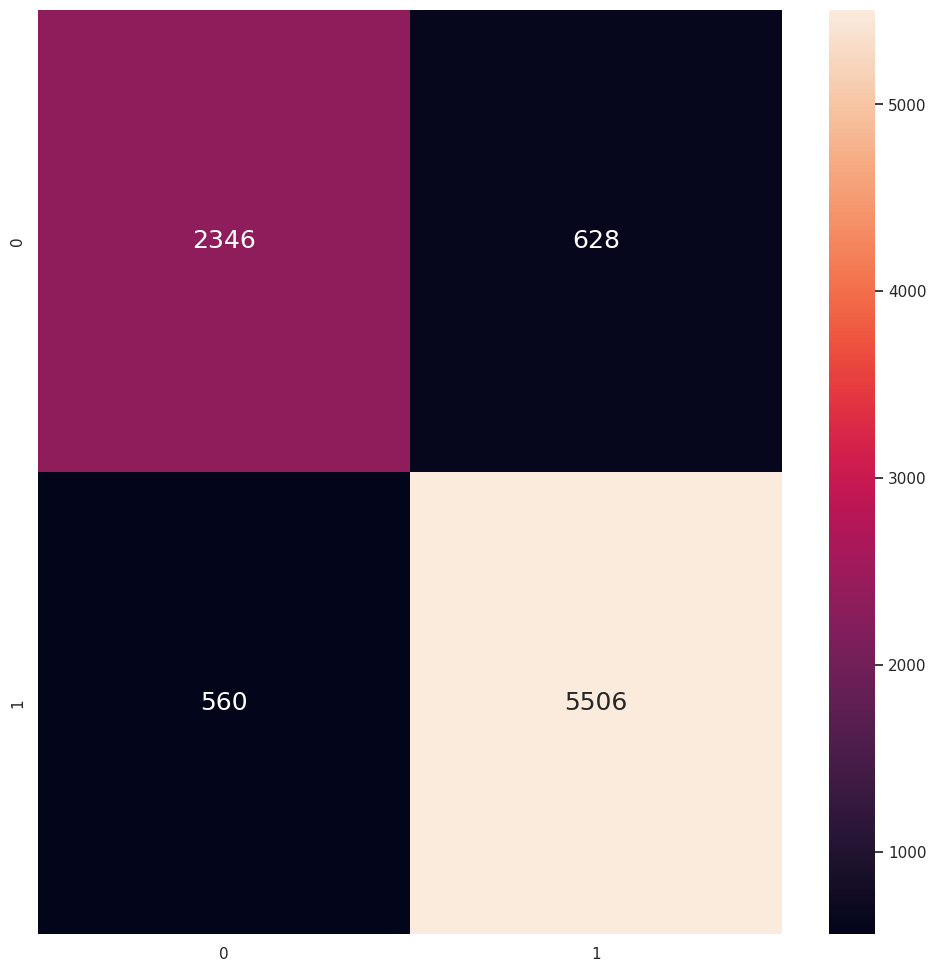

In [4]:
import pandas as pd
def printClassify(var,data,maxdepth,print):
    y = pd.DataFrame(data["booking_status"])
    X = pd.DataFrame(data[var]) 
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = maxdepth)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model
    
    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
    
    # Plot the Confusion Matrix for Test
    if(print == 1):
        f, axes = plt.subplots(1, 1, figsize=(12, 12))
        sb.heatmap(confusion_matrix(y_test, y_test_pred), 
                annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes)

    return dectree.score(X_test, y_test)
    

# List of predictors
varList = ["no_of_adults", "no_of_children", "no_of_weekend_nights", 
"no_of_week_nights", "type_of_meal_plan", "required_car_parking_space", 
"room_type_reserved", "lead_time", "repeated_guest", "no_of_previous_cancellations", 
"no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "market_segment_type_Aviation", 
"market_segment_type_Complementary", "market_segment_type_Corporate", "market_segment_type_Offline", "market_segment_type_Online"]

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Variable', 'Classification Score'])

for i in varList:
    score = printClassify(i, data, 13,0)   
    # Append the results to the dataframe
    results_df = results_df.append({'Predictor': i, 'Classification Score': score}, ignore_index=True)

# Print the results dataframe
print(results_df)
print("Top Predictors:",round(printClassify(["lead_time","avg_price_per_room","market_segment_type_Offline","no_of_weekend_nights"],data, 13,0),2))
print("Everything: ",round(printClassify(varList,data, 13,0),2))

decisionTreeScore = printClassify(varList,data, 13,1)



#### Learnings
1. Individual variables themselves are not that accurate, compared to using multiple variables.
2. Using the top 4 predictors is able to give somewhat accurate results, but to get the most accurate results, we will be using all the variables are predictors

## Implementing Random Forest Classifier
- Testing showed that best max_depth was 12, any increase will lead to overfitting

In [5]:
def printClassifyRandomForest(var, data):
    y = pd.DataFrame(data["booking_status"])
    X = pd.DataFrame(data[var]) 
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Random Tree Classifier using Train Data
    rtree = RandomForestClassifier(n_estimators=1000,max_depth=13)  # create the random tree classifier object
    rtree.fit(X_train, y_train)  # train the random tree classifier model
    
    # Predict Response corresponding to Predictors
    y_train_pred = rtree.predict(X_train)
    y_test_pred = rtree.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", rtree.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", rtree.score(X_test, y_test))
    print()
    

    return rtree.score(X_test, y_test)

randomForestScore = printClassifyRandomForest(varList,data)
print(randomForestScore)

/home/joel/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8924041297935104

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8814159292035398

0.8814159292035398


In [6]:
def printClassifyRandomForestWithGridSearch(var, data):
    y = data["booking_status"]
    X = data[var] 
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Random Tree Classifier using Train Data
    # Define the Parameter Grid
    param_grid = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 5, 10, 15]
    }
    rtree = RandomForestClassifier()
    #Use Grid Search to Find the Best Parameters
    grid_search = GridSearchCV(estimator=rtree, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    #Use the best tree from the grid search
    best_rtree = grid_search.best_estimator_
    
    # Predict Response corresponding to Predictors
    y_train_pred = best_rtree.predict(X_train)
    y_test_pred = best_rtree.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", best_rtree.score(X_train, y_train))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", best_rtree.score(X_test, y_test))
    print()
    
    return best_rtree.score(X_test, y_test)

randomForestScore = printClassifyRandomForestWithGridSearch(varList,data)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.992146017699115

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8849557522123894



### Observations from implementing GridSearchCV

- GridSearchCV optimises the best hyperparameters (n_estimators and max_depth) by testing each model
- Did not significantly changed compared to the determined hyperparameters set by us earlier
- Tended to overfit (0.99 on Train set vs 0.88 on Test set)

/home/joel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/joel/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7944690265486726


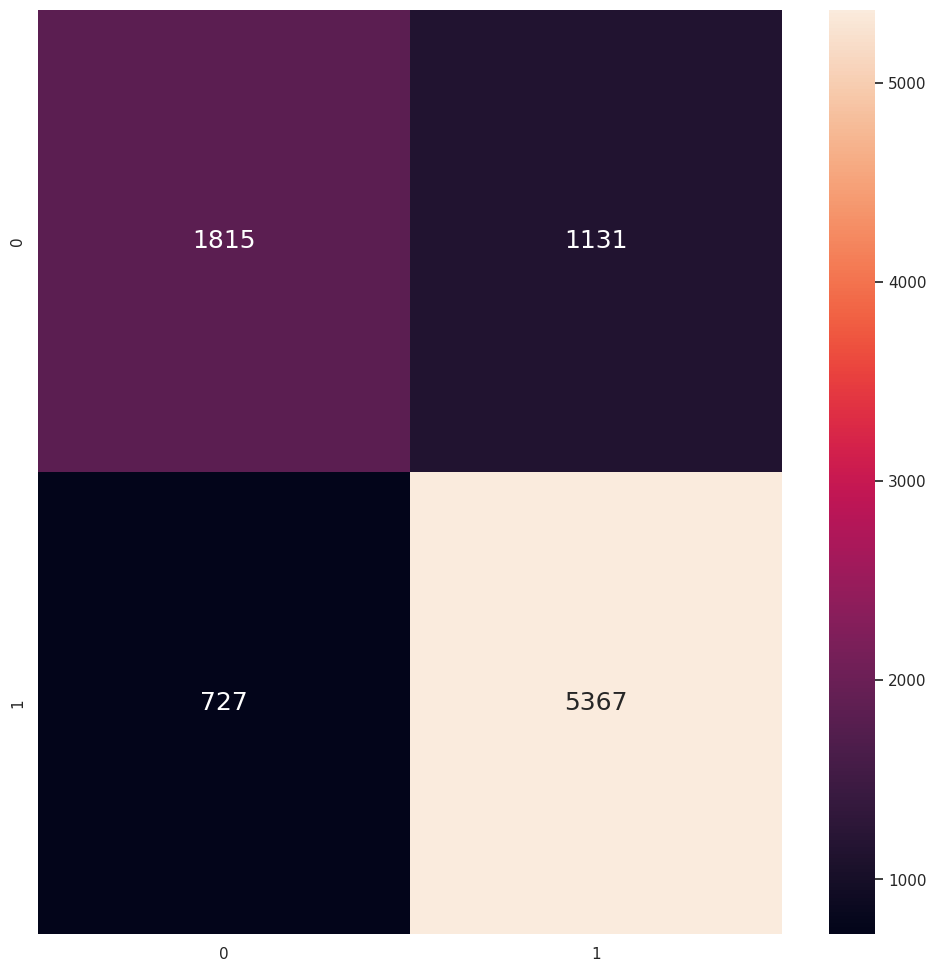

In [7]:

def printClassifyLogisticRegression(var, data):
    y = pd.DataFrame(data["booking_status"])
    X = pd.DataFrame(data[var]) 
    
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Logistic Regression using Train Data
    logreg = LogisticRegression()  # create the logistic regression object
    logreg.fit(X_train, y_train)  # train the logistic regression model
    
    # Predict Response corresponding to Predictors
    y_train_pred = logreg.predict(X_train)
    y_test_pred = logreg.predict(X_test)
    
    # Plot the Confusion Matrix for Test
    f, axes = plt.subplots(1, 1, figsize=(12, 12))
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes)

    return logreg.score(X_test, y_test)

logregScore = printClassifyLogisticRegression(varList,data)
print(logregScore)

Decision Tree Classifier Accuracy:  0.8685840707964602
Random Forest Classifier Accuracy:  0.8849557522123894
Logistic Regression Classifier Accuracy:  0.7944690265486726


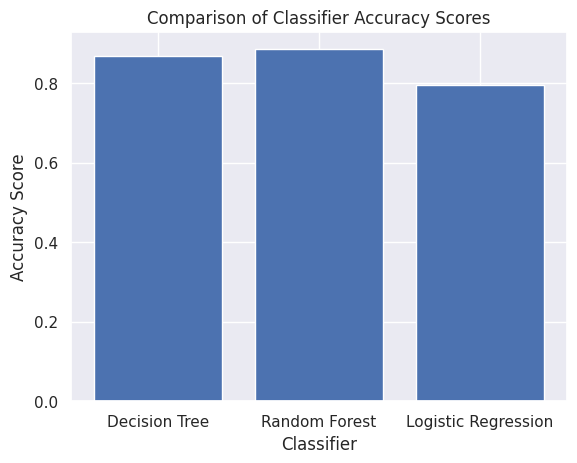

In [8]:
print("Decision Tree Classifier Accuracy: " , decisionTreeScore)
print("Random Forest Classifier Accuracy: ", randomForestScore)
print("Logistic Regression Classifier Accuracy: ", logregScore)


# Plotting the classifier accuracy scores
variables = ['Decision Tree', 'Random Forest', 'Logistic Regression']
scores = [decisionTreeScore, randomForestScore, logregScore]
plt.bar(variables, scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Classifier Accuracy Scores')

plt.show()


## Conclusion
- Random Forest Classifier is the best model for this dataset